# Deep Neural Network 

``` 
Training DNN is on multiple layers each layer with multiple neurons 
Problems of DNN training 
a. Vanishing/Exploding Gradient - Gradient grows smaller and smaller (vanishing) or larger and larger (exploding). Both of them make training of lower level layer hard. 
b. Not enough data for large networks and it is too costly to label them 
c. Trainings are extermely slow 
d. Model with millions on parameters would severly risk overfitting the training set; exspecially not enough training instances present or data is way too noisy. 


### 1. Vanishing/Exploding Gradient
``` 
- Problem was activation function (sigmoid) and weight initialization technique employed. For normal distribution mean=0 and standard deviation=1. 
- The activation function and initialization scheme, the variance of the output layer is much greater than variance of its input 
- Going forward the variance keeps increasing after each layer until activation function saturates at top level.
- And this saturation is made worse considering the fact that sigmoid/logistic function has a mean of 0.5 
- Hyperbolic tangent function has a mean of 0; thus works well in DNN

In [1]:
import numpy as np
def logit(z):
    return 1 / (1 + np.exp(-z))

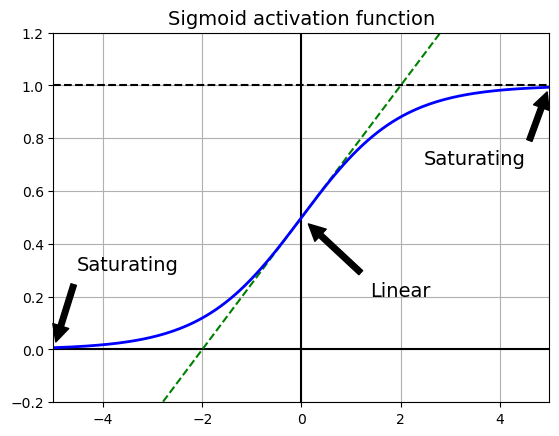

In [2]:
import matplotlib.pyplot as plt 
import matplotlib as mpl 

# create 200 even distant points between -5 and 5 
z = np.linspace(-5, 5, 200)

# plot a line for lower bound 
plt.plot([-5, 5], [0, 0], 'k-')
# plot a line for upper bound 
plt.plot([-5, 5], [1, 1], 'k--')

# plot a line from -0.2 to 1.2 
plt.plot([0, 0], [-0.2, 1.2], 'k-')

# plot a line passing passing through function intercepted line 
plt.plot([-5, 5], [-3/4, 7/4], 'g--')

# plot sigmoid function line 
plt.plot(z, logit(z), "b-", linewidth=2)

props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

``` 
- From above it is evident that Logistic function once input becomes larger (+ve or -ve); the function saturates at 0 and 1 with derivative extermly close to 0 
- when backpropagation kicks in it has virutally no gradient and propagates back through the network 
- what little graident it has gets diluted as backpropagation propogates down through the top layer, so there is nothing left for top layer.
- thus Xavier proposed we need a signal to flow properly in both directions and we dont want signal to die down. 
- Proposed a solution to have weights randomly initialized by: 
```
$fan_{avg} = (fan_{in} + fan_{out})/2$<br>
for normal distribution with mean=0 and variance $\sigma^2 = 1/fan_{avg}$ <br>
or uniform distribution between -r and +r with $r = \sqrt{3/fan_{avg}}$ <br>

<table>
<tr>
    <th>initialization</th>
    <th>activation function </th>
    <th>variance</th>
</tr>
<tr>
    <td>Glorot</td>
    <td>None, tanh, logistic, softmax</td>
    <td>1/fan_avg</td>
</tr>
<tr>
    <td>He</td>
    <td>ReLU</td>
    <td>2/fan_in</td>
</tr>
<tr>
    <td>LeCun</td>
    <td>SeLU</td>
    <td>1/fan_in</td>
</tr>
</table>
<br>
* By default Keras use Glorot initialization

In [3]:
from tensorflow import keras 
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'IdentityInitializer',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'OrthogonalInitializer',
 'RandomNormal',
 'RandomUniform',
 'STFT',
 'STFTInitializer',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'stft',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [4]:
# Create a layer with 10 neurons with activation as Relu and kernel intializer as he_normal 
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

<Dense name=dense, built=False>

In [5]:
# to use 2/fan_avg for Relu activation (this is taken care by DNN)
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

<Dense name=dense_1, built=False>

### Non Saturating Activation Function 
```
- ReLU activation does not saturate for positive values. It is not perfect & suffer from dying Relu 
- During training some neurons effectively die means stop outputting anything other than 0 
- It dies because its weights get tweaked in such a way that weighted sum of inputs are negative for all instances in training set
- When this happens; it keeps outputting zeros because ReLU funciton is zero for negative input

- to solve this problem we have many variants of relu; one of them in leaky Relu 
```
$LeakyReLU_{\alpha}(z) = max(\alpha z, z)$

$\alpha$ tells how much function leaks: slope of z < 0 is 0.01 keeps neurons in coma but does not let it die 

In [6]:

def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

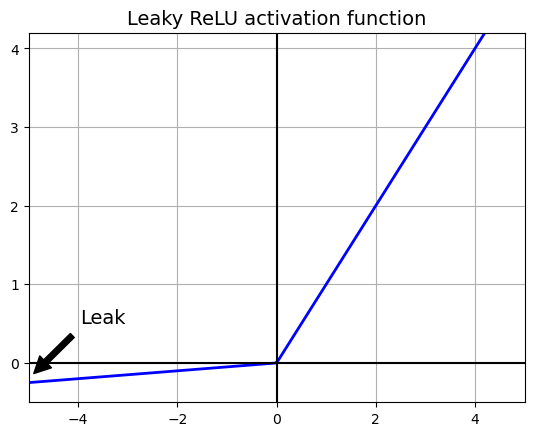

In [7]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

In [8]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['celu',
 'deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'glu',
 'hard_shrink',
 'hard_sigmoid',
 'hard_silu',
 'hard_swish',
 'hard_tanh',
 'leaky_relu',
 'linear',
 'log_sigmoid',
 'log_softmax',
 'mish',
 'relu',
 'relu6',
 'selu',
 'serialize',
 'sigmoid',
 'silu',
 'soft_shrink',
 'softmax',
 'softplus',
 'softsign',
 'sparse_plus',
 'sparsemax',
 'squareplus',
 'swish',
 'tanh',
 'tanh_shrink',
 'threshold']

In [9]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

### training fashion mnist using leaky relu 

In [10]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
import tensorflow as tf 

tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4789 - loss: 1.6721 - val_accuracy: 0.7144 - val_loss: 0.8756
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7328 - loss: 0.8275 - val_accuracy: 0.7678 - val_loss: 0.7042
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7745 - loss: 0.6899 - val_accuracy: 0.7960 - val_loss: 0.6275
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7942 - loss: 0.6223 - val_accuracy: 0.8088 - val_loss: 0.5825
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8061 - loss: 0.5811 - val_accuracy: 0.8164 - val_loss: 0.5525
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8147 - loss: 0.5527 - val_accuracy: 0.8220 - val_loss: 0.5305
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8214 - loss: 0.5317 - val_accuracy: 0.8264 - val_loss: 0.5138
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8265 - loss: 0.5153 - 

### Using PReLU

```
PReLU is parameteric ReLU and alpha is authorized to be learned during training (instead of being hyperparameter). this means the value of alpha can be changed during backpropogation

In [14]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [16]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4656 - loss: 1.7349 - val_accuracy: 0.7126 - val_loss: 0.9415
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7218 - loss: 0.8831 - val_accuracy: 0.7706 - val_loss: 0.7248
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7700 - loss: 0.7111 - val_accuracy: 0.7988 - val_loss: 0.6383
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7936 - loss: 0.6344 - val_accuracy: 0.8152 - val_loss: 0.5897
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8067 - loss: 0.5887 - val_accuracy: 0.8242 - val_loss: 0.5574
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8139 - loss: 0.5576 - val_accuracy: 0.8286 - val_loss: 0.5338
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8203 - loss: 0.5347 - val_accuracy: 0.8302 - val_loss: 0.5157
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8254 - loss: 0.5168 - 

### ELU 
$
ELU_{\alpha}(z) = \begin {cases} \alpha(\exp(z)-1) if\space z<0 \newline
z \space if \space z>=0 \end{cases}
$

``` looks a lot like ReLU; allows unit to have an average output closer to 0 and helps to alleviate the vanishing gradient problem. The hyperparameter alpha defines the ELU function apporach when z is large negative number. 
It is usually set to 1, but you can tweak it like any other hyperparameter. 
It has non zero gradient for z < 0 which avoid dead neuron problem 
if alpha = 1, then funcion smooth everywhere, including around z=0 helps to speed up grandient descent since it does not bounce to left or right of z=0 

Issue with ELU is that is exponential in nature and therefore computation takes time. It is slower than ReLU


In [17]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

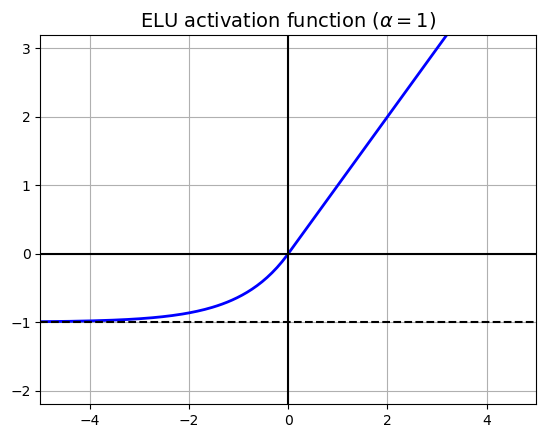

In [18]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [19]:
keras.layers.Dense(10, activation="elu")

<Dense name=dense_8, built=False>

### SELU 
This activation function was proposed in this great paper by Günter Klambauer, Thomas Unterthiner and Andreas Mayr, published in June 2017. During training, a neural network composed exclusively of a stack of dense layers using the SELU activation function and LeCun initialization will self-normalize: the output of each layer will tend to preserve the same mean and variance during training, which solves the vanishing/exploding gradients problem. As a result, this activation function outperforms the other activation functions very significantly for such neural nets, so you should really try it out. Unfortunately, the self-normalizing property of the SELU activation function is easily broken: you cannot use ℓ1 or ℓ2 regularization, regular dropout, max-norm, skip connections or other non-sequential topologies (so recurrent neural networks won't self-normalize). However, in practice it works quite well with sequential CNNs. If you break self-normalization, SELU will not necessarily outperform other activation functions.

In [20]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [21]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

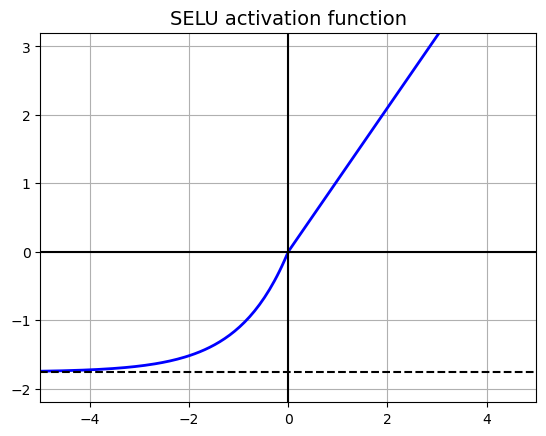

In [22]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

```
By default, the SELU hyperparameters (scale and alpha) are tuned in such a way that the mean output of each neuron remains close to 0, and the standard deviation remains close to 1 (assuming the inputs are standardized with mean 0 and standard deviation 1 too). Using this activation function, even a 1,000 layer deep neural network preserves roughly mean 0 and standard deviation 1 across all layers, avoiding the exploding/vanishing gradients problem:

In [23]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.82
Layer 900: mean 0.02, std deviation 0.99


In [24]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

<Dense name=dense_9, built=False>

In [25]:
np.random.seed(42)
tf.random.set_seed(42)

#### using SeLU

In [26]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [28]:
# scale the input for SeLU
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [29]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.4236 - loss: 1.5010 - val_accuracy: 0.7278 - val_loss: 0.7835
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.6848 - loss: 0.8752 - val_accuracy: 0.7534 - val_loss: 0.6913
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7588 - loss: 0.6734 - val_accuracy: 0.7734 - val_loss: 0.6233
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7794 - loss: 0.6226 - val_accuracy: 0.7906 - val_loss: 0.5966
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7998 - loss: 0.5753 - val_accuracy: 0.8270 - val_loss: 0.5082


``` 
using relu with same problerm

In [30]:
np.random.seed(42)
tf.random.set_seed(42)

In [31]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [32]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [33]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.1843 - loss: 2.1432 - val_accuracy: 0.3602 - val_loss: 1.6633
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3838 - loss: 1.4478 - val_accuracy: 0.5018 - val_loss: 1.1245
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.5464 - loss: 1.0620 - val_accuracy: 0.4416 - val_loss: 1.3498
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6530 - loss: 0.8734 - val_accuracy: 0.6084 - val_loss: 0.9165
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7151 - loss: 0.7462 - val_accuracy: 0.6792 - val_loss: 0.8376


# Batch Normalization

``` 
- Batch Normalization is a technique consists of adding an operation in the model just before and after activation function of the hidden layer. This operation simply zero centers and normalizes each input then scales and shift the result using 2 new parameter vectors per layer: one for scaling and one for shifting.
- Basically it lets model to learn the optimal scale and mean of each of the layer input 
- If BN layer is added as the very first layer of neural network, you dont need to standardize and rescale the training data. It will do it for you 

In [34]:
# extra code - clear the name counters and set the random seed
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [37]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [38]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7572 - loss: 0.7140 - val_accuracy: 0.8658 - val_loss: 0.3836
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8561 - loss: 0.4066 - val_accuracy: 0.8752 - val_loss: 0.3509


```
Sometimes applying BN before the activation function works better (there's a debate on this topic). Moreover, the layer before a BatchNormalization layer does not need to have bias terms, since the BatchNormalization layer some as well, it would be a waste of parameters, so you can set use_bias=False when creating those layers:

In [39]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [41]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7331 - loss: 0.8093 - val_accuracy: 0.8576 - val_loss: 0.4150
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8475 - loss: 0.4385 - val_accuracy: 0.8666 - val_loss: 0.3728
